# U.S. Medical Insurance Costs

In this project, we will be inspecting the insurance dataset, and performing analysis on its contents. The goals of this project are:
1. Explore average age:
    - average age of people with coverage
    - average age of people wiith coverage who smoke
    - average age of people with children
1. Explore cost vs age:
    - average cost of coverage sorted by age and smoker status
1. Explore effect of gender:
    - average cost by gender
    - average cost by gender and age
1. Explore gender vs child-bearing:
    - average age of someone with kids by gender
    - average age of someone without kids by gender

- Import the modules that we think we'll want to use in this notebook
- Read the file

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv

#read the file
pddata = pd.read_csv('insurance.csv')
with open('insurance.csv') as ins_file:
    insurance_data_str = ins_file.readlines()

- Now we start to clean up the data we're working with. We want to store the data as a dictionary, and the keys we're using are going to be pulled from the csv file the data is stored in. That way, if we get a new data set, as long as it has a header, it will get parsed by this script

In [4]:
#PARSE THE DATA

#collect the first row as header, convert it to our keys
header = insurance_data_str[0].split(',')       #data is comma-separated
keys = []
for i in range(len(header)):
    keys.append(header[i].strip('\n'))             #get rid of those pesky newlines
    if keys[i] == 'bmi': 
        keys[i] = keys[i].upper()               #this is really only here for nicer formatting
    else: keys[i] = keys[i].title()
    
#for the rest of the data, separate each part of it into its own data
#print(insurance_data_str)
insurance_data_lines = []
for i in range(1,len(insurance_data_str)):
    insurance_data_str[i] = insurance_data_str[i].strip('\n')
    insurance_data_lines.append(insurance_data_str[i].split(','))

# Make a key:value pair for all of the data. The overall dictionary is categorized by number starting with 0 and counting upwards. 
# Each entry is also a dictionary with the keys all organized as such
#insurance_data = {num:dataset for 
insurance_data = {}
for i in range(len(insurance_data_lines)):
    insurance_data[i] = dict(zip(keys, insurance_data_lines[i]))
    
#print(insurance_data)

### Now it's time to analyze the data. We'll have one cell available for each of our goals stated at the top of this exercise
1. Explore average age:
    - average age of people with coverage
    - average age of people wiith coverage who smoke
    - average age of people with children

In [5]:
# AVERAGE AGE
age_total = 0
smoker_age_total = 0
smoker_count = 0
children_age_total = 0
children_count = 0

for entry, data in insurance_data.items():
    age_total += float(data["Age"])
    if data["Smoker"] == "yes":
        smoker_age_total += float(data["Age"])
        smoker_count += 1
    if data["Children"] != '0':
        children_age_total += float(data["Age"])
        children_count += 1


average_age = age_total/len(insurance_data)
average_smoker_age = smoker_age_total/smoker_count
average_parent_age = children_age_total/children_count

print("This dataset has {num} participants".format(num=len(insurance_data)))
print("The average age of this data set is: ", average_age)
print("The average age of smokers with insurance is: ", average_smoker_age)
print("The average age of parents is: ", average_parent_age)

This dataset has 1338 participants
The average age of this data set is:  39.20702541106129
The average age of smokers with insurance is:  38.51459854014598
The average age of parents is:  39.78010471204188


2. Explore cost vs age:
    - average cost of coverage sorted by age and smoker status
        - break that down into a few things. Get average cost by age for smokers and non-smokers
        - show average cost by age separated into a dataset of smokers and non-smokers        

In [7]:
age_data = {}

for entry, data in insurance_data.items():
    if data["Age"] not in age_data:
        age_data.update({data["Age"]:{"Charges":[float(data["Charges"])]}})
        #age_data.update({data["Age"]:{"tot charges":float(data["Charges"])}})
    else: age_data[data["Age"]]["Charges"].append(float(data["Charges"]))
    #print(age_data)

for age, data in age_data.items():
    data["Total Charges"] = sum(data["Charges"])
    data["average"] = data["Total Charges"]/len(data["Charges"])

print(age_data)
pdage_data = pd.DataFrame(age_data)

{'19': {'Charges': [16884.924, 1837.237, 4687.797, 1625.43375, 1743.214, 2331.519, 17081.08, 1632.56445, 1261.442, 1842.519, 2719.27975, 1639.5631, 2130.6759, 34779.615, 1727.785, 17352.6803, 1832.094, 33750.2918, 36219.40545, 2803.69785, 16297.846, 1737.376, 1635.73365, 13844.506, 1261.859, 2138.0707, 1621.3402, 2134.9015, 23082.95533, 1632.03625, 1744.465, 1253.936, 1748.774, 32548.3405, 1256.299, 24059.68019, 1646.4297, 2128.43105, 1639.5631, 1242.816, 17468.9839, 34439.8559, 2709.1119, 1242.26, 1263.249, 1627.28245, 17748.5062, 1252.407, 2136.88225, 2221.56445, 2117.33885, 2913.569, 1628.4709, 2730.10785, 1759.338, 2709.24395, 16450.8947, 22493.65964, 1728.897, 36898.73308, 39722.7462, 18838.70366, 33307.5508, 1241.565, 34828.654, 2710.82855, 36397.576, 1731.677], 'Total Charges': 662857.8347499999, 'average': 9747.909334558823}, '18': {'Charges': [1725.5523, 1137.011, 2198.18985, 3393.35635, 2211.13075, 34303.1672, 21344.8467, 1705.6245, 15518.18025, 36149.4835, 1694.7964, 1631.82

[{'Charges': [16884.924, 1837.237, 4687.797, 1625.43375, 1743.214, 2331.519, 17081.08, 1632.56445, 1261.442, 1842.519, 2719.27975, 1639.5631, 2130.6759, 34779.615, 1727.785, 17352.6803, 1832.094, 33750.2918, 36219.40545, 2803.69785, 16297.846, 1737.376, 1635.73365, 13844.506, 1261.859, 2138.0707, 1621.3402, 2134.9015, 23082.95533, 1632.03625, 1744.465, 1253.936, 1748.774, 32548.3405, 1256.299, 24059.68019, 1646.4297, 2128.43105, 1639.5631, 1242.816, 17468.9839, 34439.8559, 2709.1119, 1242.26, 1263.249, 1627.28245, 17748.5062, 1252.407, 2136.88225, 2221.56445, 2117.33885, 2913.569, 1628.4709, 2730.10785, 1759.338, 2709.24395, 16450.8947, 22493.65964, 1728.897, 36898.73308, 39722.7462, 18838.70366, 33307.5508, 1241.565, 34828.654, 2710.82855, 36397.576, 1731.677], 'Total Charges': 662857.8347499999, 'average': 9747.909334558823}, {'Charges': [1725.5523, 1137.011, 2198.18985, 3393.35635, 2211.13075, 34303.1672, 21344.8467, 1705.6245, 15518.18025, 36149.4835, 1694.7964, 1631.8212, 1137.469

<Axes: xlabel='age', ylabel='average_cost'>

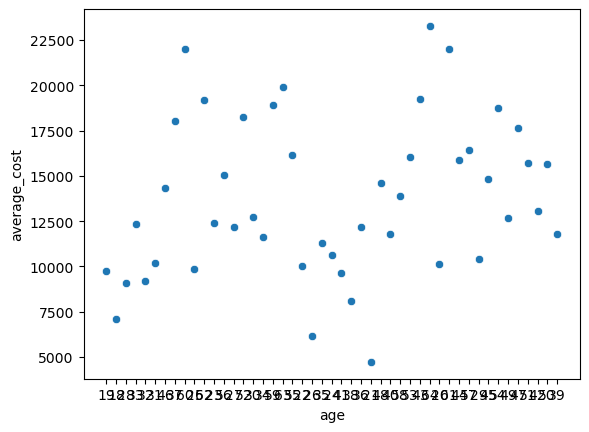

In [38]:
#print(age_data.keys())
print(list(age_data.values()))
average_charges = ()
df = pd.DataFrame.from_dict(age_data)
df2 = pd.DataFrame(age_data, index=age_data.keys())
average_charges = (value["average"] for key, value in df.items())
df3 = pd.DataFrame({'age': age_data.keys(), 'average_cost': average_charges})
sns.scatterplot(df3, x='age', y='average_cost')
